# Imports

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
import numpy as np

In [3]:
pd.set_option('display.max_columns', 25)
pd.set_option('display.max_colwidth', None)

In [4]:
import sys
# sys.path.append(r'D:\Usuarios\Kitty\Documentos\1-Master\TFM')
sys.path.append(r'D:\Programas\GitHub\TFM')

# Load Data

In [5]:
df = pd.read_csv("Credit_Card_Preprocessing.csv").drop(columns=["Id"])

In [6]:
df

,CreditLimit,Gender,EducationLevel,Marriage,Age,RepaymentStatusSep,RepaymentStatusAug,RepaymentStatusJul,RepaymentStatusJun,RepaymentStatusMay,RepaymentStatusApr,BillAmountSep,BillAmountAug,BillAmountJul,BillAmountJun,BillAmountMay,BillAmountApr,PreviousPaymentSep,PreviousPaymentAug,PreviousPaymentJul,PreviousPaymentJun,PreviousPaymentMay,PreviousPaymentApr,Default
0,20000.0,Female,University,Married,24,Delay 2 Months,Delay 2 Months,Paid Duly,Paid Duly,NaN,NaN,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,120000.0,Female,University,Single,26,Paid Duly,Delay 2 Months,No Consumption,No Consumption,No Consumption,Delay 2 Months,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,90000.0,Female,University,Single,34,No Consumption,No Consumption,No Consumption,No Consumption,No Consumption,No Consumption,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,50000.0,Female,University,Married,37,No Consumption,No Consumption,No Consumption,No Consumption,No Consumption,No Consumption,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,50000.0,Male,University,Married,57,Paid Duly,No Consumption,Paid Duly,No Consumption,No Consumption,No Consumption,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,220000.0,Male,High School,Married,39,No Consumption,No Consumption,No Consumption,No Consumption,No Consumption,No Consumption,188948.0,192815.0,208365.0,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,0
29996,150000.0,Male,High School,Single,43,Paid Duly,Paid Duly,Paid Duly,Paid Duly,No Consumption,No Consumption,1683.0,1828.0,3502.0,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0
29997,30000.0,Male,University,Single,37,Delay 4 Months,Delay 3 Months,Delay 2 Months,Paid Duly,No Consumption,No Consumption,3565.0,3356.0,2758.0,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1
29998,80000.0,Male,High School,Married,41,Delay 1 Month,Paid Duly,No Consumption,No Consumption,No Consumption,Paid Duly,-1645.0,78379.0,76304.0,52774.0,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0,1


# Parameters

In [7]:
target = "Default"

# Outliers

In [8]:
from Outliers import OutliersDetection

In [9]:
outliers = OutliersDetection(
    method="all",
    k=1.5
)

In [10]:
outliers.run(df)

** Numerical Features **
Running IQR method...
Running std method...
Running IForest method...
Running LOF method...
Running GMM method...
** Categorical Features **


In [11]:
resultsIQR = outliers.get_results(method="IQR")
resultsIQR

,Q1,Q3,IQR,lb,ub,n_outliers,p_outliers
CreditLimit,50000.00,240000.00,190000.00,-235000.000,525000.000,167.0,0.556667
Age,28.00,41.00,13.00,8.500,60.500,272.0,0.906667
BillAmountSep,3558.75,67091.00,63532.25,-91739.625,162389.375,2400.0,8.000000
BillAmountAug,2984.75,64006.25,61021.50,-88547.500,155538.500,2395.0,7.983333
BillAmountJul,2666.25,60164.75,57498.50,-83581.500,146412.500,2469.0,8.230000
BillAmountJun,2326.75,54506.00,52179.25,-75942.125,132774.875,2622.0,8.740000
BillAmountMay,1763.00,50190.50,48427.50,-70878.250,122831.750,2725.0,9.083333
BillAmountApr,1256.00,49198.25,47942.25,-70657.375,121111.625,2693.0,8.976667
PreviousPaymentSep,1000.00,5006.00,4006.00,-5009.000,11015.000,2745.0,9.150000
PreviousPaymentAug,833.00,5000.00,4167.00,-5417.500,11250.500,2714.0,9.046667


In [12]:
results = outliers.get_results()
results

,IQR n_outliers,IQR p_outliers,std n_outliers,std p_outliers,IForest n_outliers,IForest p_outliers,LOF n_outliers,LOF p_outliers,GMM n_outliers,GMM p_outliers
CreditLimit,167,0.556667,2476,8.253333,1497,4.990000,1497,4.990000,1497,4.990000
Age,272,0.906667,2747,9.156667,1120,3.733333,1120,3.733333,1120,3.733333
BillAmountSep,2400,8.000000,2415,8.050000,1494,4.980000,1494,4.980000,1494,4.980000
BillAmountAug,2395,7.983333,2386,7.953333,1495,4.983333,1495,4.983333,1495,4.983333
BillAmountJul,2469,8.230000,2337,7.790000,1496,4.986667,1496,4.986667,1496,4.986667
BillAmountJun,2622,8.740000,2365,7.883333,1490,4.966667,1490,4.966667,1490,4.966667
BillAmountMay,2725,9.083333,2436,8.120000,1499,4.996667,1499,4.996667,1499,4.996667
BillAmountApr,2693,8.976667,2446,8.153333,1495,4.983333,1495,4.983333,1495,4.983333
PreviousPaymentSep,2745,9.150000,786,2.620000,1500,5.000000,1500,5.000000,1500,5.000000
PreviousPaymentAug,2714,9.046667,606,2.020000,1500,5.000000,1500,5.000000,1500,5.000000


In [13]:
data_transformed = outliers.transform(df, method="IQR", metric="median")

In [14]:
results_cat = outliers.get_results_cat_vars()
results_cat

,n_outliers,p_outliers,categories
Gender,0.0,0.0,NaN
EducationLevel,454,1.513333,"[Others, Unknown]"
Marriage,377,1.256667,"[Others, Unknown]"
RepaymentStatusSep,463,1.543333,"[Delay 3 Months, Delay 4 Months, Delay 5 Months, Delay 6 Months, Delay 7 Months, Delay 8 Months]"
RepaymentStatusAug,511,1.703333,"[Delay 1 Month, Delay 3 Months, Delay 4 Months, Delay 5 Months, Delay 6 Months, Delay 7 Months, Delay 8 Months]"
RepaymentStatusJul,394,1.313333,"[Delay 1 Month, Delay 3 Months, Delay 4 Months, Delay 5 Months, Delay 6 Months, Delay 7 Months, Delay 8 Months]"
RepaymentStatusJun,351,1.17,"[Delay 1 Month, Delay 3 Months, Delay 4 Months, Delay 5 Months, Delay 6 Months, Delay 7 Months, Delay 8 Months]"
RepaymentStatusMay,342,1.14,"[Delay 3 Months, Delay 4 Months, Delay 5 Months, Delay 6 Months, Delay 7 Months, Delay 8 Months]"
RepaymentStatusApr,313,1.043333,"[Delay 3 Months, Delay 4 Months, Delay 5 Months, Delay 6 Months, Delay 7 Months, Delay 8 Months]"
Default,0.0,0.0,NaN


In [15]:
lst_vars_combine = ['RepaymentStatusSep', 'RepaymentStatusAug', 'RepaymentStatusJul', 'RepaymentStatusJun', 'RepaymentStatusMay', 'RepaymentStatusApr']
categories_combine = ['Delay 3 Months', 'Delay 4 Months', 'Delay 5 Months', 'Delay 6 Months', 'Delay 7 Months', 'Delay 8 Months']
for var in lst_vars_combine:
    data_transformed = outliers.combine_categories(data_transformed, var, categories_combine, "Delay 2+ Months")

In [18]:
data_transformed.to_csv("Credit_Card_Outliers.csv", index=0)

D:\Programas\GitHub\TFM\Outliers.py:489: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.



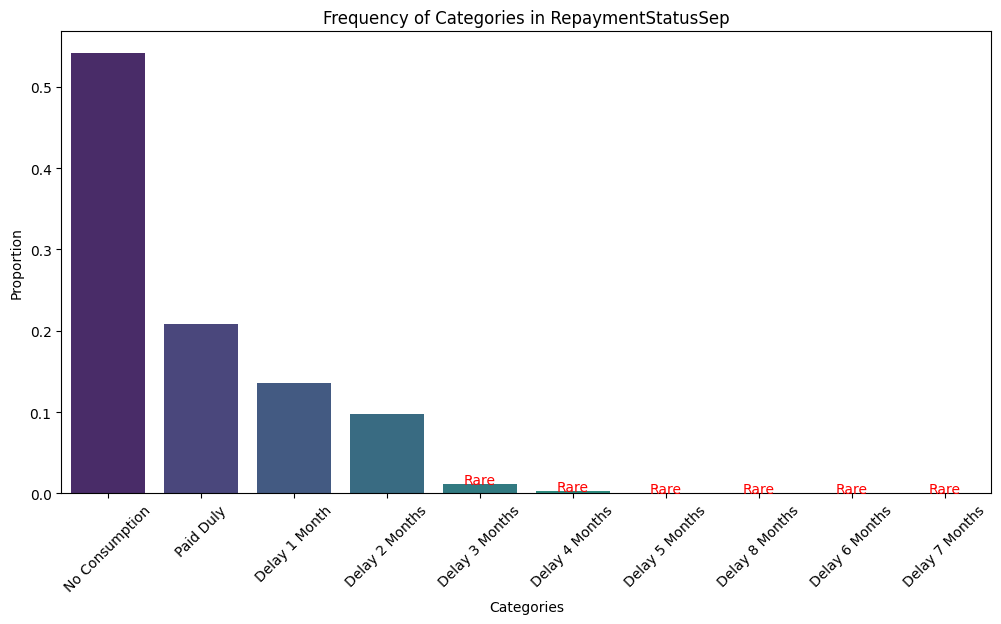

In [25]:
outliers.plot_outliers_categorical(df, 'RepaymentStatusSep')